# Orders

✏️ **Exercise**

Today, we will investigate the **orders**, and their associated review score.

For that purpose, we will create one single data table containing **all unique orders as index and all properties of these orders as columns.**

Our goal is to create the following DataFrame, which will come very handy later on for our modelling phase

  - `order_id` (_str) the id of the order_
  - `wait_time` (_float) the number of days between order_date and delivered_date_
  - `delay_vs_expected` (_float) if the actual delivery date is later than the estimated delivery date, returns the absolute number of days between the two dates, otherwise return 0_
  - `dim_is_five_star` (_int) 1 if the order received a five_star, 0 otherwise_
  - `dim_is_one_star` (_int) 1 if the order received a one_star, 0 otherwise_
  - `review_score`(_int) from 1 to 5_
  - `number_of_product` (_int) number of products that the order contains_
  - `number_of_sellers` (_int) number of sellers involved in the order_
  - `price` (_float) total price of the order paid by customer_
  - `freight_value` (_float) value of the freight paid by customer_
  - (Optional) `distance_customer_seller` (_float) the distance in km between customer and seller_
  
We also want to filter out "non-delivered" orders, unless explicitely specified

❓ **Your challenge**: 

- Implement each feature as a separate method within the `Order` class available at `olist/order.py`
- Then, create a method `get_training_data()` that returns the complete DataFrame.

Suggested methodology:
- Use the notebook below to write and test your code step-by-step first
- Then copy the code into `order.py` once you are certain of your code logic
- Focus on the data manipulation logic now, we will analyse the dataset visually in the next challenges

<details>
    <summary>🔥 Notebook best practices (must read) </summary>

From now on, exploratory notebooks are going get pretty very long, and we strongly advice you to follow these notebook principles
- Code your logic so that your Notebook can always be run from top to bottom without crashing (Cell --> Run All)
- Name your variables carefully 
- Use dummy names such as `tmp` or `_` for intermediary steps when you know you won't need them long
- Clear your code and merge cells when relevant (`Shit-M`) to merge two cells to minimize Notebook size
- Hide your cell output if you don't need to see it anymore (double click on the red `Out[]:` section to the left of your cell).
- Make heavy use of jupyber nbextention `Collapsable Headings` and `Table of Content` (call a TA if you can't find them)
- Use the following shortcuts 
    - `a` to insert a cell above
    - `b` to insert a cell below
    - `dd` to delete a cell
    - `esc` and `arrows` to move between cells
    - `shit-Enter` to execute cell and move focus to the next one
    - use `Shift + Tab` when you're between method brackets e.g. `group_by()` to get the docs! Repeat many time to open it permanently

</details>





In [1]:
# Auto reload imported module everytime a jupyter cell is executed (handy for olist.order.py updates)
%load_ext autoreload
%autoreload 2

In [2]:
# Import usual modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import olist data
from olist.data import Olist
olist=Olist()
data=olist.get_data()
matching_table = olist.get_matching_table()

## Code `order.py`

In [4]:
orders = data['orders'].copy() # good practice to be sure not to modify your `data` variable

### get_wait_time
Return a dataframe with [order_id, wait_time, expected_wait_time ,delay_vs_expected]

Hints:
- Don't forget to convert dates from "string" type to "pandas.datetime' using [`pandas.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
- Take time to understand what python [`datetime`](https://docs.python.org/3/library/datetime.html) objects are 

In [5]:
# We give you the pseudo-code below for this first method:

# Inspect orders dataframe
# handle datetime
# compute wait time
# compute delay vs expected - Carefully handles "negative" delays
# check new dataframe and copy code carefully to `olist/order.py`

In [6]:
orders = data['orders'].copy()
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [7]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [8]:
# handle datetime
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [9]:
orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']

0        8 days 10:28:40
1       13 days 18:46:08
2        9 days 09:27:40
3       13 days 05:00:36
4        2 days 20:58:23
5       16 days 13:00:50
6                    NaT
7        9 days 23:45:21
8        9 days 19:39:01
9       18 days 05:19:28
10      12 days 15:37:21
11       5 days 18:06:37
12      12 days 01:59:33
13       4 days 22:08:15
14      11 days 09:21:58
15      13 days 20:31:20
16      17 days 06:38:16
17      12 days 22:55:05
18       6 days 18:24:19
19      13 days 06:27:34
20      21 days 07:52:16
21       4 days 09:15:52
22       4 days 19:36:11
23      18 days 09:37:09
24       4 days 06:39:47
25      28 days 22:17:01
26      12 days 15:20:42
27       9 days 12:51:24
28      14 days 09:10:46
29      30 days 09:38:44
              ...       
99411    2 days 05:48:00
99412    8 days 22:56:18
99413    5 days 05:19:09
99414   12 days 18:15:22
99415                NaT
99416    3 days 18:37:48
99417   26 days 06:46:54
99418   13 days 02:40:22
99419    4 days 08:12:50


In [10]:
# Compute just the number of days in each time_delta 
import datetime
one_day_delta = datetime.timedelta(days=1) # a "timedelta" object of 1 day
one_day_delta = np.timedelta64(24, 'h') # a "timedelta64" object of 1 day (use the one you prefer)

# Assign compute delay vs expected
orders.loc[:,'wait_time'] = \
    (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / one_day_delta

orders.loc[:,'delay_vs_expected'] = \
    (orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']) / one_day_delta

orders.loc[:,'expected_wait_time'] = \
    (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']) / one_day_delta

In [11]:
# Other method using pandas magic is less good: it rounds to the day so less interesting
(orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

0         8.0
1        13.0
2         9.0
3        13.0
4         2.0
5        16.0
6         NaN
7         9.0
8         9.0
9        18.0
10       12.0
11        5.0
12       12.0
13        4.0
14       11.0
15       13.0
16       17.0
17       12.0
18        6.0
19       13.0
20       21.0
21        4.0
22        4.0
23       18.0
24        4.0
25       28.0
26       12.0
27        9.0
28       14.0
29       30.0
         ... 
99411     2.0
99412     8.0
99413     5.0
99414    12.0
99415     NaN
99416     3.0
99417    26.0
99418    13.0
99419     4.0
99420    12.0
99421    14.0
99422    10.0
99423    39.0
99424    10.0
99425    20.0
99426     7.0
99427     6.0
99428    10.0
99429     2.0
99430     8.0
99431    14.0
99432    37.0
99433    16.0
99434    11.0
99435    11.0
99436     8.0
99437    22.0
99438    24.0
99439    17.0
99440     7.0
Length: 99441, dtype: float64

In [12]:
def handle_delay(x):
    if x < 0:
        return abs(x)
    else:
        return 0

orders.loc[:,'delay_vs_expected'] = orders['delay_vs_expected'].apply(handle_delay)

In [13]:
orders[['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected']]

,order_id,wait_time,expected_wait_time,delay_vs_expected
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.000000
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.000000
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.000000
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.000000
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.000000
5,a4591c265e18cb1dcee52889e2d8acc3,16.542245,22.085359,0.000000
6,136cce7faa42fdb2cefd53fdc79a6098,NaN,27.484630,0.000000
7,6514b8ad8028c9f2cc2374ded245783f,9.989826,21.451042,0.000000
8,76c6e866289321a7c93b82b54852dc33,9.818762,41.229757,0.000000
9,e69bfb5eb88e0ed6a785585b27e16dbf,18.221852,24.503449,0.000000


In [14]:
# Check your new dataframe and commit your code to olist/order.py when it works. 
# Test it below
from olist.order import Order
Order().get_wait_time()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.000000,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.000000,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.000000,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.000000,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.000000,delivered
5,a4591c265e18cb1dcee52889e2d8acc3,16.542245,22.085359,0.000000,delivered
7,6514b8ad8028c9f2cc2374ded245783f,9.989826,21.451042,0.000000,delivered
8,76c6e866289321a7c93b82b54852dc33,9.818762,41.229757,0.000000,delivered
9,e69bfb5eb88e0ed6a785585b27e16dbf,18.221852,24.503449,0.000000,delivered
10,e6ce16cb79ec1d90b1da9085a6118aeb,12.650937,21.179745,0.000000,delivered


### get_review_score
     Returns a DataFrame with:
        order_id, dim_is_five_star, dim_is_one_star, review_score

In [15]:
reviews = data['order_reviews'].copy()
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [16]:
# Fill the functions below, that you will have to apply "element-wise" to each Series in the next cell below
# So as to create the 2 new columns requested 

def dim_five_star(d):
    if d == 5:
        return 1
    else:
        return 0


def dim_one_star(d):
    if d == 1:
        return 1
    else:
        return 0

In [17]:
reviews["dim_is_five_star"] = reviews["review_score"].map(dim_five_star) # --> Series([0, 1, 1, 0, 0, 1 ...])


reviews["dim_is_one_star"] = reviews["review_score"].map(dim_one_star) # --> Series([0, 1, 1, 0, 0, 1 ...])

In [18]:
reviews[["order_id", "dim_is_five_star", "dim_is_one_star", "review_score"]]

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
5,b18dcdf73be66366873cd26c5724d1dc,0,1,1
6,e48aa0d2dcec3a2e87348811bcfdf22b,1,0,5
7,c31a859e34e3adac22f376954e19b39d,1,0,5
8,9c214ac970e84273583ab523dfafd09b,1,0,5
9,b9bf720beb4ab3728760088589c62129,0,0,4


In [19]:
# Check your new dataframe and commit your code to olist/order.py when it works. 
# Test it below
from olist.order import Order
Order().get_review_score()

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
5,b18dcdf73be66366873cd26c5724d1dc,0,1,1
6,e48aa0d2dcec3a2e87348811bcfdf22b,1,0,5
7,c31a859e34e3adac22f376954e19b39d,1,0,5
8,9c214ac970e84273583ab523dfafd09b,1,0,5
9,b9bf720beb4ab3728760088589c62129,0,0,4


### get_number_products:
     Returns a DataFrame with:
        order_id, number_of_products (total number of products per order)

In [20]:
data["order_items"].groupby("order_id").count()\
.rename(columns={"order_item_id": "number_of_products"})\
.sort_values("number_of_products")[['number_of_products']]

,number_of_products
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
a6e9d106235bcf1dda54253686d89e99,1
a6e9b80a7636eb8dd592dbb3e20d0a91,1
a6e963c11e80432334e984ead4797a8b,1
a6e8ad5db31e71f5f12671af561acb4a,1
a6e88e8981bb9dbb574107cfd606e4ba,1
a6e7e7222c014201fbfcdfb8c4593ce7,1
a6e7a9c6f4effc360a418d5bba41ba03,1
a6e75a284bbd3aa94f0e329d2522f996,1


In [21]:
# Check your new dataframe and commit your code to olist/order.py when it works. 
Order().get_number_products()

,order_id,number_of_products
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
5,00048cc3ae777c65dbb7d2a0634bc1ea,1
6,00054e8431b9d7675808bcb819fb4a32,1
7,000576fe39319847cbb9d288c5617fa6,1
8,0005a1a1728c9d785b8e2b08b904576c,1
9,0005f50442cb953dcd1d21e1fb923495,1


### get_number_sellers:
     Returns a DataFrame with:
        order_id, number_of_sellers (total number of unique sellers per order)

<details>
    <summary>Hint</summary>

`pd.Series.nunique()`
</details>

In [22]:
sellers = \
    data['order_items']\
    .groupby('order_id')['seller_id'].nunique().reset_index()

sellers.columns = ['order_id', 'number_of_sellers']
sellers.sort_values('number_of_sellers')

,order_id,number_of_sellers
0,00010242fe8c5a6d1ba2dd792cb16214,1
65559,aaaf314a8cf0d0da71e52c6cd4184cbd,1
65558,aaaea350ff8a957595f3c631d6b63d1b,1
65557,aaae80f5b6239bd9e1b22e9aa542c3e8,1
65556,aaabf43feb9498d9de4588eb73231c25,1
65555,aaabb4935fd6db331104e2cf134d60d8,1
65554,aaab96ab260f2839451f9c2839d59109,1
65553,aaab909ba45f8f27f46401f49a92b9e9,1
65552,aaab824b480222c061bba0fa4886308e,1
65551,aaaa1cf782eda8062dd7d1aae7a40490,1


In [23]:
# Check your new dataframe and commit your code to olist/order.py when it works. 
Order().get_number_sellers()

,order_id,number_of_sellers
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
5,00048cc3ae777c65dbb7d2a0634bc1ea,1
6,00054e8431b9d7675808bcb819fb4a32,1
7,000576fe39319847cbb9d288c5617fa6,1
8,0005a1a1728c9d785b8e2b08b904576c,1
9,0005f50442cb953dcd1d21e1fb923495,1


### get_price_and_freight
     Returns a DataFrame with:
        order_id, price, freight_value, price

<details>
    <summary>Hint</summary>

`pd.Series.agg()` allows you to apply one transformation method per columns of your groupby object
</details>

In [24]:
price_freight = \
    data['order_items']\
    .groupby('order_id',
             as_index=False).agg({'price': 'sum',
                                  'freight_value': 'sum'})
price_freight

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,53.99,11.40


In [25]:
# Check your new dataframe and commit your code to olist/order.py when it works. 
Order().get_price_and_freight()

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,53.99,11.40


### get_distance_seller_customer (OPTIONAL - Try only after finishing today's challenges)
[order_id, distance_seller_customer] (the distance in km between customer and seller)

💡Have a look at the `haversine_distance` formula we coded for you in the `olist.utils` module

In [26]:
# Select sellers and customers 
sellers = data['sellers']
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [27]:
customers = data['customers']
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [28]:
# Select geo dataset
geo = data['geolocation'].sort_values(by='geolocation_zip_code_prefix')
geo.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1246,1001,-23.549292,-46.633559,sao paulo,SP
429,1001,-23.550498,-46.634338,sao paulo,SP
1182,1001,-23.549779,-46.633957,sao paulo,SP
1435,1001,-23.549292,-46.633559,sao paulo,SP
326,1001,-23.551427,-46.634074,sao paulo,SP


In [29]:
# Warning: Since one zipcode can map to multiple [lat, lng], we take the first one
geo = geo.groupby('geolocation_zip_code_prefix', as_index=False).first()

In [30]:
# merge geo_location for sellers
sellers_mask_columns = ['seller_id', 'seller_zip_code_prefix', 'seller_city', 
                        'seller_state', 'geolocation_lat', 'geolocation_lng']
sellers_geo = sellers.merge(geo,
                            how='left',
                            left_on='seller_zip_code_prefix',
                            right_on='geolocation_zip_code_prefix')[sellers_mask_columns]
sellers_geo.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.884842,-47.045901
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.380142,-46.947588


In [31]:
#merge geo_location for customers
customers_mask_columns = ['customer_id', 'customer_zip_code_prefix', 'customer_city', 
                          'customer_state', 'geolocation_lat', 'geolocation_lng']
customers_geo = customers.merge(geo,
                            how='left',
                            left_on='customer_zip_code_prefix',
                            right_on='geolocation_zip_code_prefix')[customers_mask_columns]
customers_geo.head(2)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.483960,-47.403324
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,-23.730435,-46.537419


In [32]:
#use the matching table to and merge customers 
matching_table.head(2)

,customer_id,order_id,review_id,product_id,seller_id
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,a54f0611adc9ed256b57ede6b6eb5114,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,8d5266042046a06655c8db133d120ba5,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962


In [33]:
# use the matching table and merge sellers 
matching_geo = matching_table.merge(sellers_geo, on='seller_id')
matching_geo.head(2)

,customer_id,order_id,review_id,product_id,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,a54f0611adc9ed256b57ede6b6eb5114,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,9350,maua,SP,-23.678446,-46.436776
1,ab8844663ae049fda8baf15fc928f47f,8736140c61ea584cb4250074756d8f3b,b8238c6515192f8129081e17dc57d169,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,9350,maua,SP,-23.678446,-46.436776


In [34]:
matching_geo = matching_geo.merge(customers_geo, on='customer_id', suffixes=('_seller', '_customer'))

In [35]:
#check that shape is correct
matching_geo.shape

(113322, 15)

In [36]:
#any na? 
matching_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113322 entries, 0 to 113321
Data columns (total 15 columns):
customer_id                 113322 non-null object
order_id                    113322 non-null object
review_id                   113322 non-null object
product_id                  113322 non-null object
seller_id                   113322 non-null object
seller_zip_code_prefix      113322 non-null int64
seller_city                 113322 non-null object
seller_state                113322 non-null object
geolocation_lat_seller      113065 non-null float64
geolocation_lng_seller      113065 non-null float64
customer_zip_code_prefix    113322 non-null int64
customer_city               113322 non-null object
customer_state              113322 non-null object
geolocation_lat_customer    113015 non-null float64
geolocation_lng_customer    113015 non-null float64
dtypes: float64(4), int64(2), object(9)
memory usage: 13.8+ MB


_We find that some rows for geo_seller and geo_customer are nulls due to our left outer joins. Let's remove them with dropna()_

In [37]:
#remove na()
matching_geo = matching_geo.dropna()

In [38]:
# Add the distance between seller and customers using our utils function
from olist.utils import haversine_distance
print(haversine_distance.__doc__)


    Compute distance between two pairs of (lon1, lat1, lon2, lat2)
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    


In [39]:
matching_geo["distance_seller_customer"] = matching_geo.apply(
    lambda row: haversine_distance(
        row["geolocation_lng_seller"],
        row["geolocation_lat_seller"],
        row["geolocation_lng_customer"],
        row["geolocation_lat_customer"],
    ),
    axis=1,
)

In [40]:
matching_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112759 entries, 0 to 113321
Data columns (total 16 columns):
customer_id                 112759 non-null object
order_id                    112759 non-null object
review_id                   112759 non-null object
product_id                  112759 non-null object
seller_id                   112759 non-null object
seller_zip_code_prefix      112759 non-null int64
seller_city                 112759 non-null object
seller_state                112759 non-null object
geolocation_lat_seller      112759 non-null float64
geolocation_lng_seller      112759 non-null float64
customer_zip_code_prefix    112759 non-null int64
customer_city               112759 non-null object
customer_state              112759 non-null object
geolocation_lat_customer    112759 non-null float64
geolocation_lng_customer    112759 non-null float64
distance_seller_customer    112759 non-null float64
dtypes: float64(5), int64(2), object(9)
memory usage: 14.6+ MB


In [41]:
# Check that distance is roughly accurate in sampling 3 cases (really, check it on google map!)
matching_geo.sample(3)[['seller_city', 
                        'customer_city', 
                        'distance_seller_customer']]

,seller_city,customer_city,distance_seller_customer
71045,sao paulo,sao francisco de paula,777.772562
10282,sao paulo,jaguariuna,99.649133
82223,sao paulo,recife,2145.178916


<AxesSubplot:xlabel='distance_seller_customer'>

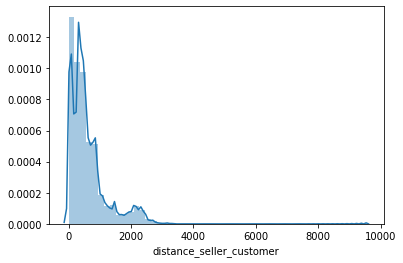

In [42]:
# A quick distribution plot for the road!
sns.distplot(matching_geo['distance_seller_customer'])

In [43]:
# Check median distance
matching_geo['distance_seller_customer'].describe()

count    112759.000000
mean        596.995471
std         591.469742
min           0.000000
25%         184.198874
50%         431.778487
75%         791.408829
max        9475.172387
Name: distance_seller_customer, dtype: float64

In [44]:
# Since an order can have multiple sellers, return the average of the distance per order
mean_order_distance = matching_geo.groupby("order_id", as_index=False).agg(
    {"distance_seller_customer": "mean"}
)
mean_order_distance

,order_id,distance_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,300.596556
1,00018f77f2f0320c557190d7a144bdd3,589.759782
2,000229ec398224ef6ca0657da4fc703e,312.805797
3,00024acbcdf0a6daa1e931b038114c75,293.638497
4,00042b26cf59d7ce69dfabb4e55b4fd9,647.398281
5,00048cc3ae777c65dbb7d2a0634bc1ea,161.557160
6,00054e8431b9d7675808bcb819fb4a32,485.679996
7,000576fe39319847cbb9d288c5617fa6,549.006117
8,0005a1a1728c9d785b8e2b08b904576c,53.023679
9,0005f50442cb953dcd1d21e1fb923495,33.251870


In [45]:
mean_order_distance.describe()

,distance_seller_customer
count,98177.000000
mean,601.927864
std,597.076321
min,0.000000
25%,186.408224
50%,433.737086
75%,798.405787
max,9475.172387


In [46]:
# Check your new dataframe and commit your code to olist/order.py when it works. 
Order().get_distance_seller_customer()

,order_id,distance_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,301.005664
1,00018f77f2f0320c557190d7a144bdd3,589.274140
2,000229ec398224ef6ca0657da4fc703e,312.495046
3,00024acbcdf0a6daa1e931b038114c75,301.951753
4,00042b26cf59d7ce69dfabb4e55b4fd9,646.221788
5,00048cc3ae777c65dbb7d2a0634bc1ea,161.597746
6,00054e8431b9d7675808bcb819fb4a32,484.118172
7,000576fe39319847cbb9d288c5617fa6,547.472665
8,0005a1a1728c9d785b8e2b08b904576c,52.440494
9,0005f50442cb953dcd1d21e1fb923495,33.159828


# Test your newly coded module

❓ Time to code `get_training_data` making use of your previous coded methods.

In [47]:
%%time
from olist.order import Order
result = Order().get_training_data()
result

CPU times: user 2.12 s, sys: 179 ms, total: 2.3 s
Wall time: 2.31 s


,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.000000,delivered,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.000000,delivered,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.000000,delivered,1,0,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.000000,delivered,1,0,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.000000,delivered,1,0,5,1,1,19.90,8.72
5,a4591c265e18cb1dcee52889e2d8acc3,16.542245,22.085359,0.000000,delivered,0,0,4,1,1,147.90,27.36
6,6514b8ad8028c9f2cc2374ded245783f,9.989826,21.451042,0.000000,delivered,1,0,5,1,1,59.99,15.17
7,76c6e866289321a7c93b82b54852dc33,9.818762,41.229757,0.000000,delivered,0,1,1,1,1,19.90,16.05
8,e69bfb5eb88e0ed6a785585b27e16dbf,18.221852,24.503449,0.000000,delivered,1,0,5,1,1,149.99,19.77
9,e6ce16cb79ec1d90b1da9085a6118aeb,12.650937,21.179745,0.000000,delivered,0,1,1,2,1,198.00,61.06


🏁 Congratulation! Commit and push your notebook before starting the next challenge.